# Bike Price Prediction using Linear Regression

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [36]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

# Get Missing Values Drop

In [37]:
df=df.dropna()

# Get Information of Dataframe


In [38]:
df.info()   #gives column name, count,  not null category, D-type(data type)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              626 non-null    object 
 1   Model              626 non-null    object 
 2   Selling_Price      626 non-null    int64  
 3   Year               626 non-null    int64  
 4   Seller_Type        626 non-null    object 
 5   Owner              626 non-null    object 
 6   KM_Driven          626 non-null    int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 44.0+ KB


In [39]:
df.describe()   #gives the linear relation of each column with another column

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [40]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [41]:
df.isnull().sum() #(df.isna().sum() gives same result)
#gives the sum of all null values columns-wise

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

In [42]:
df.nunique()   #gives total no. of unique entries 

Brand                 18
Model                183
Selling_Price         99
Year                  18
Seller_Type            2
Owner                  4
KM_Driven            219
Ex_Showroom_Price    230
dtype: int64

In [43]:
df.shape

(626, 8)

#Get Categories and Counts of Categorical Variables

In [44]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [45]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [46]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [47]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

# Get Column Names

In [48]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# Get Encoding of Categorical Features

In [49]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [76]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [77]:
#X=pd.get_dummies(X,columns=['Seller_Type','Owner'],drop_first=True)

In [85]:
df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,0,0,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,0,0,35000,32000.0
2,Yo,Yo Style,20000,2011,0,0,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,0,0,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,0,1,35000,42859.0
...,...,...,...,...,...,...,...,...
621,Harley,Harley-Davidson Street 750,330000,2014,0,3,6500,534000.0
622,Kawasaki,Kawasaki Ninja 650 [2018-2019],300000,2011,0,0,12000,589000.0
623,Kawasaki,Kawasaki Ninja 650 [2018-2019],425000,2017,0,1,13600,599000.0
624,Suzuki,Suzuki GSX S750,760000,2019,0,0,2800,752020.0


# Define y

In [86]:
y=df['Selling_Price']

In [87]:
y.shape

(626,)

In [88]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [89]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [90]:
X.shape

(626, 5)

In [91]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2323)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

# Get Model Test 

In [98]:
from sklearn.linear_model import LinearRegression 

In [99]:
lr= LinearRegression()

In [100]:
lr.fit(X_train, y_train)

LinearRegression()

# Get Model Prediction

In [101]:
y_pred= lr.predict(X_test)

In [102]:
y_pred.shape

(188,)

In [103]:
y_pred

array([ 35870.79961642,  65547.96126415,  12371.09961996,  64148.8895839 ,
         7062.69388653,  54402.63506136,  -1912.44035159,  29775.20161928,
        14243.08480753,  22080.83178243,  84025.43006156,  38292.33063928,
        29354.69337304,  21525.66151869,  51718.07386067, 133108.79218061,
        36717.94936617,  61355.37093641,  28387.67135344,  43699.33828063,
        73829.7721122 , 121281.37404139, 257025.1574888 , -13165.16881032,
        46855.75420218,  52525.81083583,  21528.77516102,  58963.76859935,
        36453.23827565,  59092.23873301,  52537.87619985,  31275.42528094,
        50620.8218115 ,  67631.38902032,  56630.86444395, 117293.32518539,
        34037.48760149,  49778.37056618, 111705.80584799,  21536.11351636,
        44867.13135661,  74909.17128765, 421105.83467059,  73670.58645457,
        51287.25308003,  14423.62915765,  99846.44490246,  54487.16853425,
       101946.69838917,  79576.38985325, 117362.89863505,  37565.98215828,
        68125.63747921,  

# Get Model Evaluation

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [112]:
mean_squared_error(y_test,y_pred)

293014701.66187763

In [113]:
mean_absolute_percentage_error(y_test,y_pred)

0.24947046843526693

In [114]:
r2_score(y_test,y_pred)

0.8738616789555578

#Geet Visualization of Actual Vs Predicted Results

In [116]:
import matplotlib.pyplot as plt

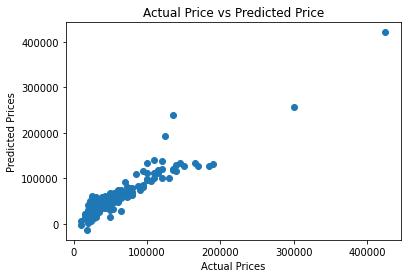

In [120]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [136]:
X_new= df.sample(1)

In [137]:
X_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
4,Bajaj,Bajaj Discover 100,24999,2012,0,1,35000,42859.0


In [138]:
X_new.shape

(1, 8)

In [139]:
X_new=X_new.drop(['Selling_Price','Brand','Model'],axis=1)

In [144]:
X_new

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
4,2012,0,1,35000,42859.0


In [145]:
X_new.shape

(1, 5)

In [146]:
y_pred_new= lr.predict(X_new)

In [147]:
y_pred_new

array([11014.37068462])